In [2]:
import pandas as pd

# ML stuff
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

samples_transformed =  pd.read_csv('data_gen/samples_transformed.csv')

In [3]:
print('Total patients', samples_transformed.shape[0],'\n')
print('Missing values:  \n', samples_transformed.isna().sum().sort_values(ascending=False))
print('\n Drop: HbA1c')
samples_transformed.drop(labels=['HbA1c'],axis=1, inplace=True)
print('')

Total patients 5124 

Missing values:  
 HbA1c                         5096
P-glucose                     4591
blood_pressure_diastoliskt    3216
blood_pressure_systoliskt     3216
BMI                           2727
E113                             0
I639                             0
gender                           0
expired                          0
I109                             0
E119                             0
E669                             0
I259                             0
I252                             0
I209                             0
E660                             0
E118                             0
age                              0
dtype: int64

 Drop: HbA1c



In [41]:
samples_transformed.describe()

,age,gender,P-glucose,blood_pressure_diastoliskt,blood_pressure_systoliskt,BMI,expired,I109,E119,E669,I259,I252,I209,E660,E118,I639,E113
count,5124.000000,5124.000000,533.000000,1908.000000,1908.000000,2397.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.000000,5124.00000
mean,53.263271,0.430133,8.599045,77.070755,128.469078,27.574632,0.089188,0.286300,0.129977,0.088993,0.062646,0.051327,0.031226,0.027908,0.026737,0.024005,0.02381
std,19.516985,0.495143,5.248298,11.434808,18.069538,5.924398,0.285043,0.452075,0.336310,0.284761,0.242349,0.220686,0.173944,0.164725,0.161329,0.153079,0.15247
min,19.000000,0.000000,3.100000,8.000000,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,36.000000,0.000000,6.425000,70.000000,118.000000,23.487502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,53.000000,0.000000,7.392308,78.000000,128.000000,26.982661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,67.000000,1.000000,9.545455,84.000000,140.000000,30.859375,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,102.000000,1.000000,77.000000,145.000000,225.000000,60.586735,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<Figure size 1800x1200 with 0 Axes>

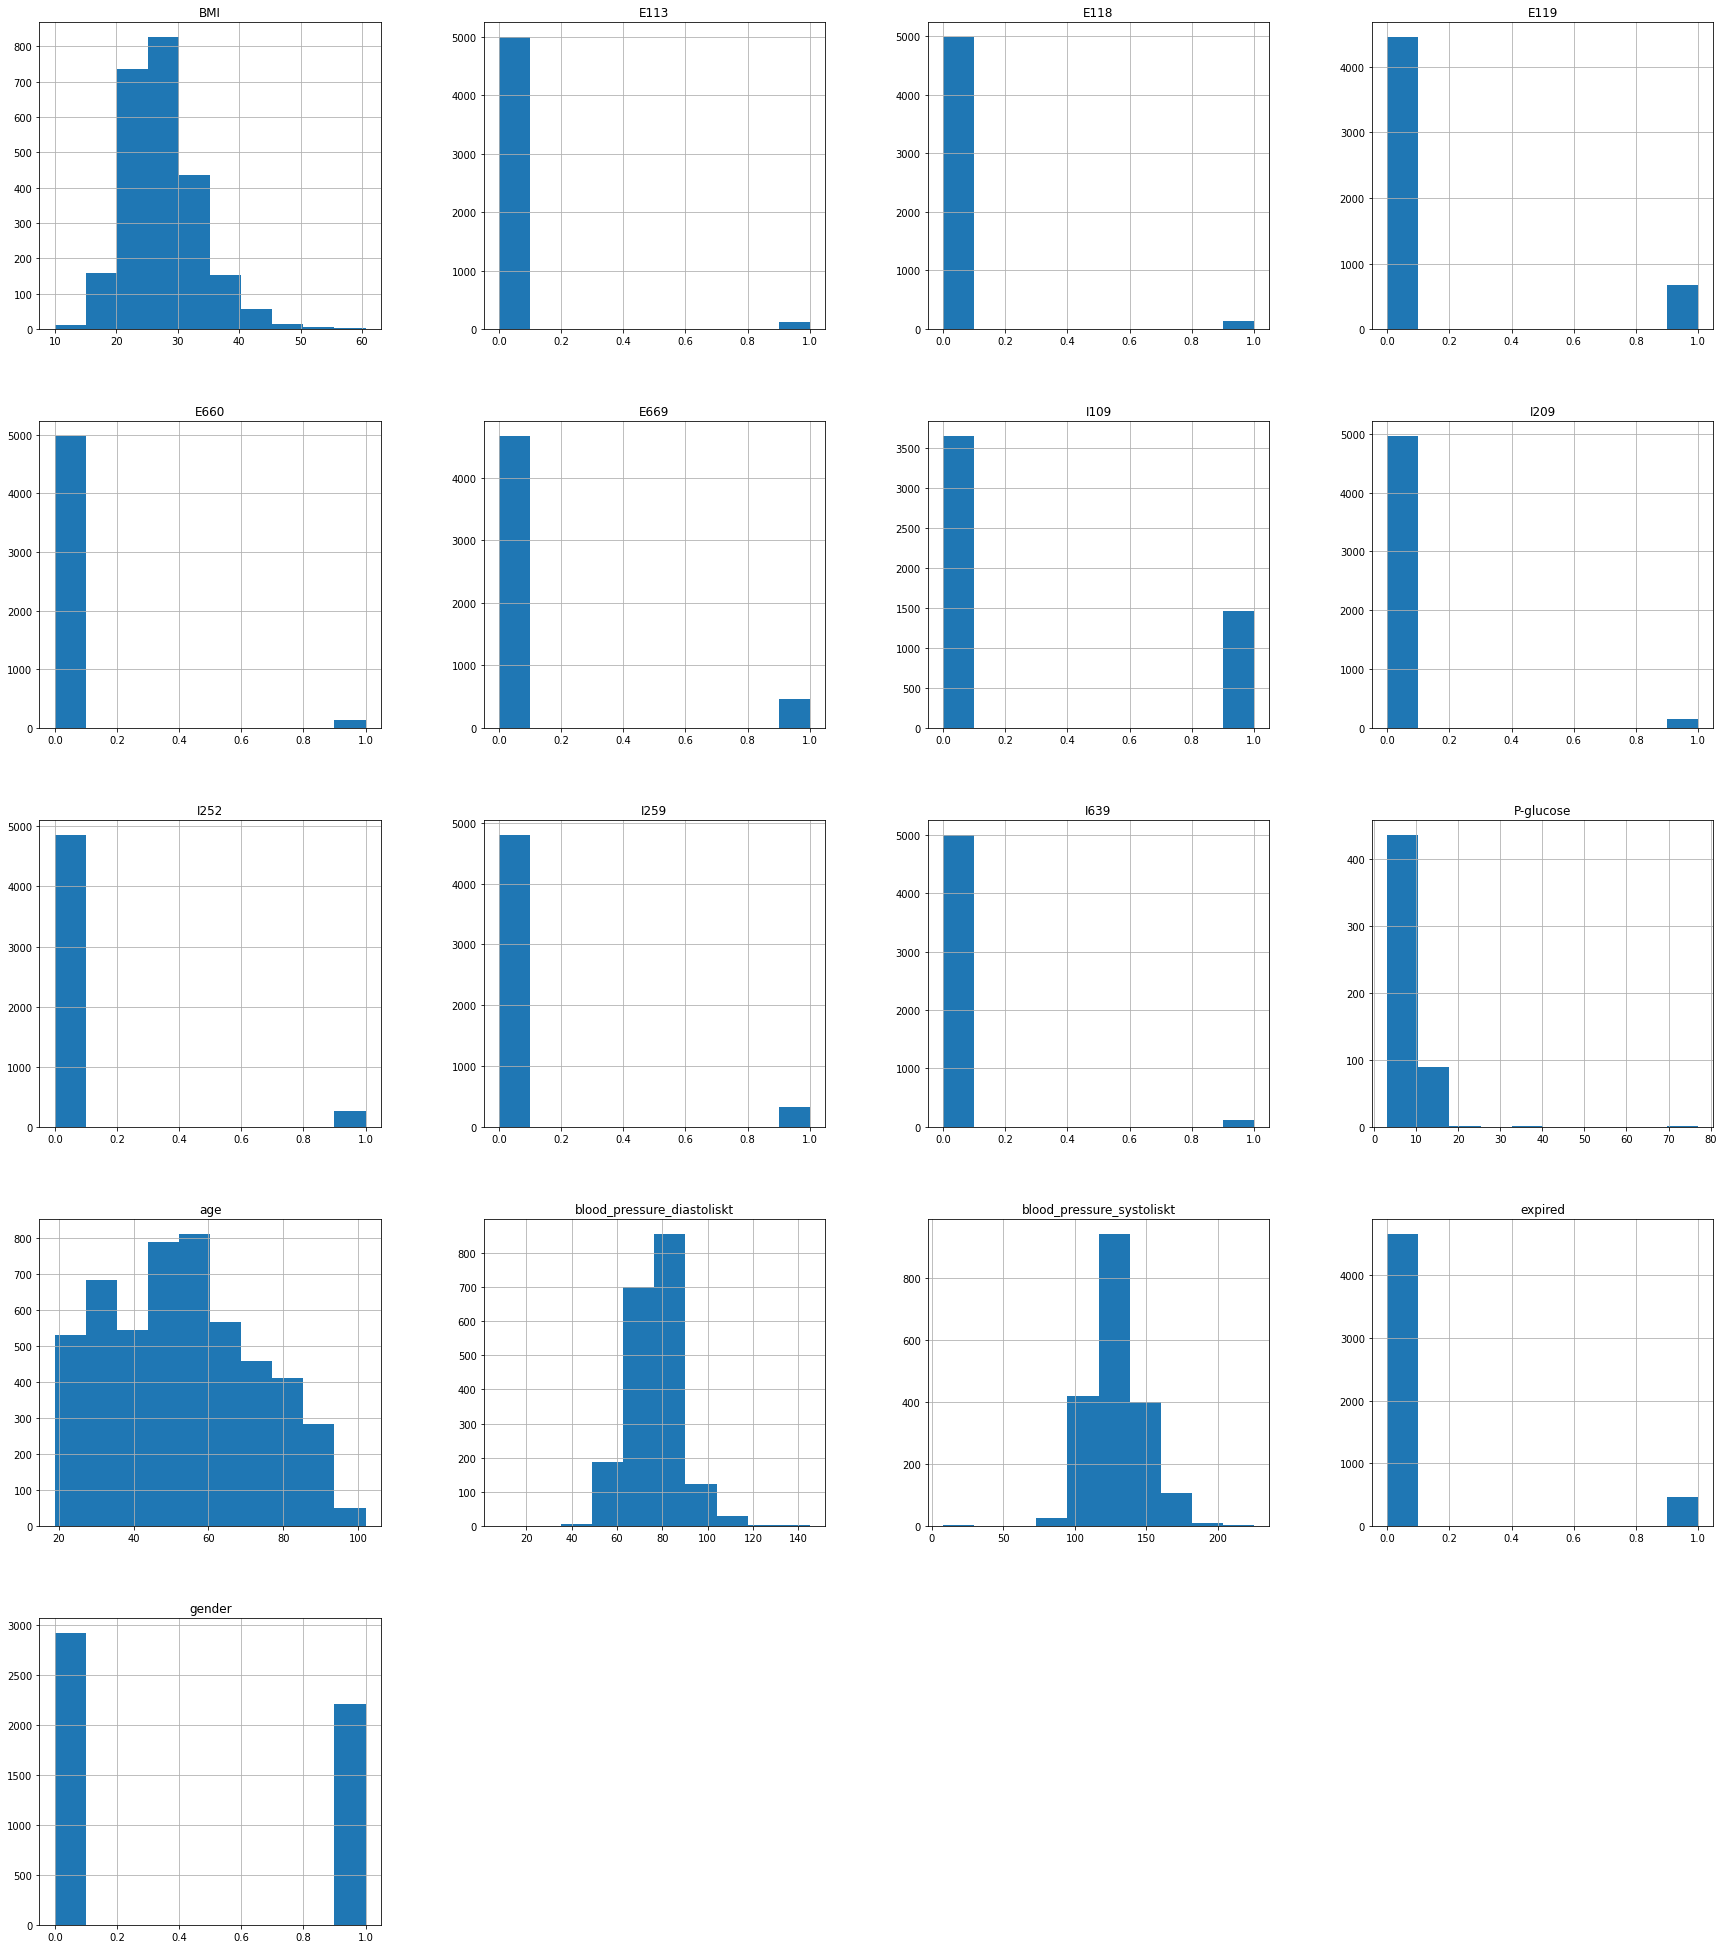

In [42]:
# Show histogram distributions
plt.figure(dpi=300)
samples_transformed.hist(sharey=False,figsize=(30,35)) # 4867
print('')

In [43]:
# Numbers of admissions ending in death
n_died =  samples_transformed[samples_transformed.expired==1].shape[0]

# No imputation

In [44]:
# Generate new (non-shallow) copy
df = samples_transformed.copy(deep=True)

# Entire dataset
samples_transformed.to_csv('./data_gen/dataset_missing_entire.csv', index=False)

# Undersample
df = df[df.expired==1].append(df[df.expired==0].sample(n_died))
df.to_csv('./data_gen/dataset_missing_undersampled.csv', index=False)
print('done')

done


# Mean imputation

In [45]:
# Generate new (non-shallow) copy
df = samples_transformed.copy(deep=True)

# Replace missing values(nan values) with mean of column
for column in enumerate(df.columns.values.tolist()):
    df[column[1]].fillna(inplace=True, value=df[column[1]].mean())
    
# Entire dataset
df.to_csv('./data_gen/dataset_mean_entire.csv', index=False)

# Undersample
df = df[df.expired==1].append(df[df.expired==0].sample(n_died))
df.to_csv('./data_gen/dataset_mean_undersampled.csv', index=False)
print('done')

done


# KNN imputation

In [46]:

# Function to impute missing values using KNN
def impute_missing(df):
    target_temp = df.expired.values.tolist()
    # Don't include target variable in KNN, it would introduce bias
    df = df.drop(columns=['expired'])
    df_cols = df.columns
    # scaler
    scaler = StandardScaler()
    # imputer
    imputer = KNNImputer(n_neighbors=5)

    # re-scale dataframe
    df = pd.DataFrame(scaler.fit_transform(df), columns =df_cols)
    # impute missing values
    df = pd.DataFrame(imputer.fit_transform(df),columns = df_cols)
    # re-scale to original values
    df = pd.DataFrame(scaler.inverse_transform(df), columns = df_cols)
    
    # Re-add target variable
    df['expired'] = target_temp
    
    return df

In [47]:
# New copy and impute
df = impute_missing(samples_transformed.copy(deep=True))

# Entire dataset
df.to_csv('./data_gen/dataset_KNN_entire.csv', index=False)

# Undersample
df = df[df.expired==1].append(df[df.expired==0].sample(n_died))
df.to_csv('./data_gen/dataset_KNN_undersampled.csv', index=False)
print('done')

done
